# EDA Анализ электрохимических данных

**Автор:** Анна Пономарец
**Проект:** Анализ электрохимии с дата инжиниринга

## Оглавление
1. [Введение]
2. [Загрузка данных]
3. [Оценка базовых данных]
4. [Оценка полноты данных]
5. [Оценка уникальности]
6. [Статистический анализ данных]
6. [АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ]
   [выводы по разделам]
7. [Заключение]


## Введение

**Цель исследования:** Провести exploratory data analysis (EDA) электрохимических данных для оценки их качества и пригодности для дальнейшего анализа.

**Задачи:**
- Оценить структуру и объем данных
- Проверить полноту данных (Completeness ≥ 0.98)
- Проверить уникальность записей (Uniqueness = 1.0)
- Выявить выбросы и аномалии
- Сформулировать рекомендации по предобработке

**Метрики качества:**
- Completeness (полнота) ≥ 0.98
- Uniqueness (уникальность) = 1.0

**Загрузка данных**


In [16]:
print("🎉 Тестируем подключение...")
import sys
sys.path.append('/workspaces/EC-lab-files')

try:
    from data_loader import main as load_data
    print("✅ Дата-лоадер подключен!")
    
    import pandas as pd
    print("✅ Pandas подключен!")
    
    # Проверим есть ли уже файлы
    if os.path.exists("инжиниринг.parquet"):
        df = pd.read_parquet("инжиниринг.parquet")
        print(f"✅ Файл найден: {df.shape}")
    else:
        print("📥 Файла нет, нужно запустить дата-лоадер")
        
except Exception as e:
    print(f"❌ Ошибка: {e}")

🎉 Тестируем подключение...
✅ Дата-лоадер подключен!
✅ Pandas подключен!
📥 Файла нет, нужно запустить дата-лоадер


In [17]:
# Запускаем дата-лоадер для скачивания данных
print("📥 Запускаем дата-лоадер...")
from data_loader import main as load_data

load_data()

print("✅ Данные должны быть скачаны и обработаны!")

📥 Запускаем дата-лоадер...
Файл не найден — начинаем скачивание.


Downloading...
From (original): https://drive.google.com/uc?id=1YF8duBM5HERkyCPAUPlzrs9mirZInNkT
From (redirected): https://drive.google.com/uc?id=1YF8duBM5HERkyCPAUPlzrs9mirZInNkT&confirm=t&uuid=e15b5535-6e52-4f10-abda-6f4071ef54cb
To: /workspaces/EC-lab-files/my_electrochem_project/notebooks/инжиниринг.csv
100%|██████████| 222M/222M [00:01<00:00, 203MB/s] 


Хэш скачанного файла: d380426c075b294b3a5808b987a352c53e8b3ff3ae99e6bec50423a710166c1f
Читаем CSV с 62-й строки как заголовок...
🧮 Нормализуем числовые данные (запятые → точки, e-формат)...

Первые 10 ID:
0    -0,3V CA with magnet_C01.mpt
1    -0,3V CA with magnet_C01.mpt
2    -0,3V CA with magnet_C01.mpt
3    -0,3V CA with magnet_C01.mpt
4    -0,3V CA with magnet_C01.mpt
5    -0,3V CA with magnet_C01.mpt
6    -0,3V CA with magnet_C01.mpt
7    -0,3V CA with magnet_C01.mpt
8    -0,3V CA with magnet_C01.mpt
9    -0,3V CA with magnet_C01.mpt
Name: id, dtype: category
Categories (69, object): ['-0,3V CA with magnet_C01.mpt', '-0,3V CA without magnet_C01.mpt', '-0,3V pure biooil C-C electrode 23.01_C01.mpt', '-0,3V with magnet_C01.mpt', ..., 'ca  test biooil blank C ZnCl2 1,5M раздельная..., 'ca biooil blank C HCl 1M раздельная ячейка ра..., 'ca biooil blank C ZnCl2 1,5M раздельная ячейк..., 'ca biooil blank C ZnCl2 1M раздельная ячейка ...]

Первые 10 строк числовых данных:
   mode  error 

In [18]:
# Проверяем создание файлов
import os

files = ["инжиниринг.csv", "инжиниринг.parquet"]
for file in files:
    if os.path.exists(file):
        print(f"✅ {file} - создан")
        file_size = os.path.getsize(file) / (1024*1024)  # размер в MB
        print(f"   Размер: {file_size:.2f} MB")
    else:
        print(f"❌ {file} - не найден")

✅ инжиниринг.csv - создан
   Размер: 211.84 MB
✅ инжиниринг.parquet - создан
   Размер: 5.83 MB


In [19]:
# Загружаем данные из Parquet
df = pd.read_parquet("инжиниринг.parquet")
print(f"✅ Данные загружены в DataFrame")
print(f"📊 Размер: {df.shape}")

# Показываем первые строки
print("\n🔍 Первые 3 строки:")
display(df.head(3))

✅ Данные загружены в DataFrame
📊 Размер: (1048514, 27)

🔍 Первые 3 строки:


,id,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,time/s,control/V,Ewe/V,<I>/mA,dQ/C,(Q-Qo)/C,I Range,Q charge/discharge/mA.h,half cycle,Energy charge/W.h,Energy discharge/W.h,Capacitance charge/µF,Capacitance discharge/µF,Q discharge/mA.h,Q charge/mA.h,Capacity/mA.h,Efficiency/%,cycle number,P/W
0,"-0,3V CA with magnet_C01.mpt",2.0,0,0.0,1.0,0.0,0.0,0.0,0.1,-0.955,-0.955,-6.24,-0.000136,-0.000136,11.0,-0.000038,0.0,0.0,3.600000e-08,0.0,0.0,0.000038,0.0,0.000038,0.0,0.0,0.00597
1,"-0,3V CA with magnet_C01.mpt",2.0,0,0.0,1.0,0.0,0.0,0.0,0.2,-0.955,-0.955,-3.62,-0.000498,-0.000498,11.0,-0.000138,0.0,0.0,1.320000e-07,0.0,8690000.0,0.000138,0.0,0.000138,0.0,0.0,0.00346
2,"-0,3V CA with magnet_C01.mpt",2.0,0,0.0,1.0,0.0,0.0,0.0,0.3,-0.955,-0.955,-2.12,-0.000710,-0.000710,11.0,-0.000197,0.0,0.0,1.880000e-07,0.0,12400000.0,0.000197,0.0,0.000197,0.0,0.0,0.00203


**Оценка базовых данных**


In [20]:
print("## БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print("=" * 40)

print(f"📊 Общее количество записей: {df.shape[0]:,}")
print(f"🎯 Количество признаков: {df.shape[1]}")
print(f"💾 Объем данных: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 Типы данных:")
print(df.dtypes.value_counts())

## БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ
📊 Общее количество записей: 1,048,514
🎯 Количество признаков: 27
💾 Объем данных: 250.91 MB

📋 Типы данных:
float64     25
category     1
object       1
Name: count, dtype: int64


Оценка полноты данных

## ОЦЕНКА ПОЛНОТЫ ДАННЫХ (COMPLETENESS)
🎯 ЦЕЛЕВОЙ ПОКАЗАТЕЛЬ: ≥ 0.98


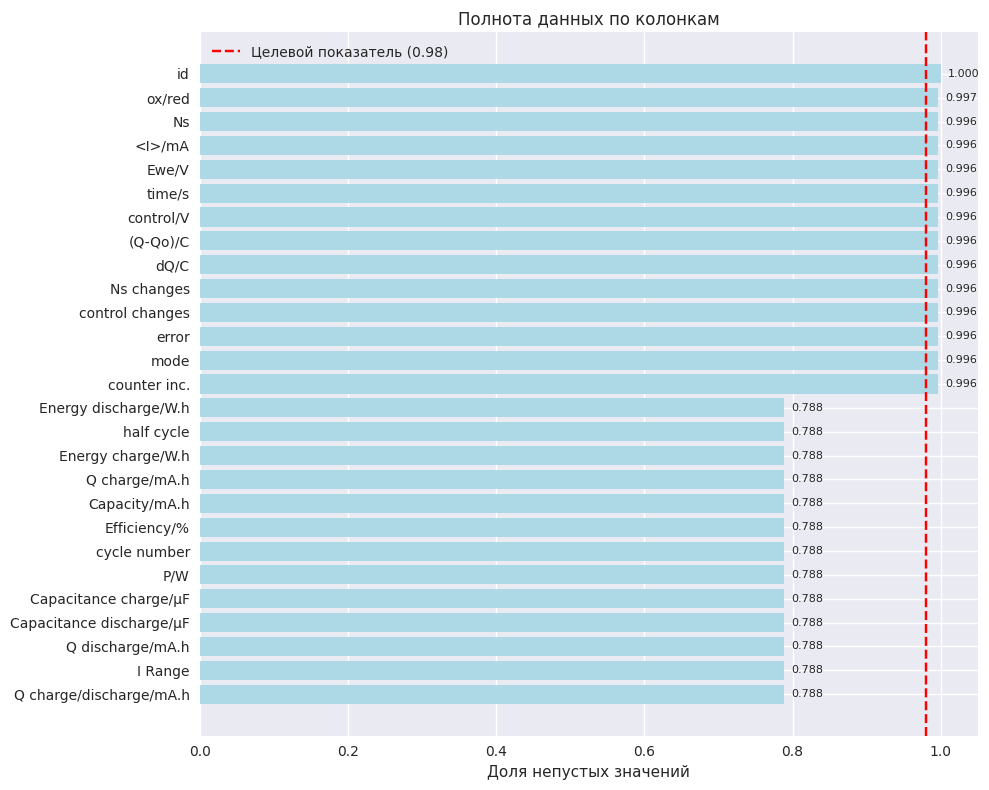

✅ Колонки с полнотой ≥ 0.98: 14/27
⚠️ Проблемные колонки:


,Колонка,Полнота,Пропуски
15,Q charge/discharge/mA.h,0.788357,221911
14,I Range,0.788357,221911
21,Q discharge/mA.h,0.788357,221911
20,Capacitance discharge/µF,0.788357,221911
19,Capacitance charge/µF,0.788357,221911
26,P/W,0.788357,221911
25,cycle number,0.788357,221911
24,Efficiency/%,0.788357,221911
23,Capacity/mA.h,0.788357,221911
22,Q charge/mA.h,0.788357,221911


In [21]:
print("## ОЦЕНКА ПОЛНОТЫ ДАННЫХ (COMPLETENESS)")
print("=" * 50)

# Расчет полноты
completeness = df.notnull().mean()
completeness_df = pd.DataFrame({
    'Колонка': completeness.index,
    'Полнота': completeness.values,
    'Пропуски': df.isnull().sum().values
}).sort_values('Полнота')

print(f"🎯 ЦЕЛЕВОЙ ПОКАЗАТЕЛЬ: ≥ 0.98")

# Визуализация
plt.figure(figsize=(10, 8))
bars = plt.barh(completeness_df['Колонка'], completeness_df['Полнота'], color='lightblue')
plt.axvline(x=0.98, color='red', linestyle='--', label='Целевой показатель (0.98)')
plt.xlabel('Доля непустых значений')
plt.title('Полнота данных по колонкам')
plt.legend()

# Добавляем значения на бары
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Анализ достижения целей
good_columns = completeness_df[completeness_df['Полнота'] >= 0.98]
print(f"✅ Колонки с полнотой ≥ 0.98: {len(good_columns)}/{len(df.columns)}")
if len(good_columns) < len(df.columns):
    problem_columns = completeness_df[completeness_df['Полнота'] < 0.98]
    print(f"⚠️ Проблемные колонки:")
    display(problem_columns)

УНикальность данных

In [23]:
print("## ОЦЕНКА УНИКАЛЬНОСТИ ДАННЫХ (UNIQUENESS)")
print("=" * 50)

# Проверяем ID колонку
if 'id' in df.columns:
    total_ids = len(df)
    unique_ids = df['id'].nunique()
    uniqueness_ratio = unique_ids / total_ids
    
    print(f"🔍 Анализ колонки 'id':")
    print(f"   Всего ID: {total_ids:,}")
    print(f"   Уникальных ID: {unique_ids:,}")
    print(f"   Коэффициент уникальности: {uniqueness_ratio:.6f}")
    
    if uniqueness_ratio == 1.0:
        print("   🎉 ЦЕЛЕВОЙ ПОКАЗАТЕЛЬ ДОСТИГНУТ: = 1.0")
    else:
        print(f"   ⚠️ Найдено дубликатов: {total_ids - unique_ids}")
        
        # Покажем примеры дубликатов
        duplicates = df[df.duplicated(subset=['id'], keep=False)]
        if len(duplicates) > 0:
            duplicate_counts = duplicates['id'].value_counts().head(3)
            print(f"   Примеры дублирующихся ID:")
            for dup_id, count in duplicate_counts.items():
                print(f"      {dup_id}: {count} повторений")
else:
    print("⚠️ Колонка 'id' не найдена в данных")
    
    # Проверяем полные дубликаты строк
    total_duplicates = df.duplicated().sum()
    if total_duplicates > 0:
        print(f"🔍 Найдено полных дубликатов строк: {total_duplicates}")
    else:
        print("✅ Полных дубликатов строк не найдено")

## ОЦЕНКА УНИКАЛЬНОСТИ ДАННЫХ (UNIQUENESS)
🔍 Анализ колонки 'id':
   Всего ID: 1,048,514
   Уникальных ID: 69
   Коэффициент уникальности: 0.000066
   ⚠️ Найдено дубликатов: 1048445
   Примеры дублирующихся ID:
      -0,3V pure biooil C-C electrode 23.01_C01.mpt: 72061 повторений
      ca biooil blank C ZnCl2 1,5M раздельная ячейка рабочий в электролите ХС в масле sp200_C01.mpt: 72061 повторений
      ca biooil blank C HCl 1M раздельная ячейка рабочий в электрлите противо в масле, сравнения в электролите, HCl электролит 1М в 1 части_C01.mpt: 72061 повторений


Статистический анализ данных

In [24]:
print("## СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ ДАННЫХ")
print("=" * 50)

# Выбираем числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"🔢 Числовых колонок: {len(numeric_cols)}")

if len(numeric_cols) > 0:
    print("\n📊 Базовая статистика:")
    display(df[numeric_cols].describe())
    
    # Анализ выбросов для ключевых метрик
    key_metrics = ['Ewe/V', 'control/V', '<I>/mA', 'Capacity/mA.h', 'cycle number']
    available_metrics = [m for m in key_metrics if m in df.columns]
    
    if available_metrics:
        print(f"\n📈 Ключевые метрики: {available_metrics}")
        for col in available_metrics:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
            print(f"   {col}: {len(outliers)} выбросов ({len(outliers)/len(df)*100:.2f}%)")

## СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ ДАННЫХ
🔢 Числовых колонок: 25

📊 Базовая статистика:


,mode,error,control changes,Ns changes,counter inc.,Ns,time/s,control/V,Ewe/V,<I>/mA,dQ/C,(Q-Qo)/C,I Range,Q charge/discharge/mA.h,half cycle,Energy charge/W.h,Energy discharge/W.h,Capacitance charge/µF,Capacitance discharge/µF,Q discharge/mA.h,Q charge/mA.h,Capacity/mA.h,Efficiency/%,cycle number,P/W
count,1044527.0,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,826603.000000,826603.000000,826603.000000,8.266030e+05,826603.000000,8.266030e+05,8.266030e+05,826603.000000,8.266030e+05,826603.000000,826603.000000,826603.0,826603.000000
mean,2.0,1.378614e-04,6.168907e-01,9.690702e-02,1.527914e+02,-1.934966e-01,1.239721e+03,-1.915920e+00,4.064194e-01,-8.577346e+00,-3.002817e+00,-5.353676e+00,11.164437,-1.877852,0.007976,4.211386e-09,0.002205,1.185375e+05,7.737978e+10,1.877852,1.046280e-07,1.877852,0.002165,0.0,0.012210
std,0.0,1.174064e-02,4.861448e-01,2.958313e-01,3.695561e+02,4.325359e-01,1.677984e+03,4.913982e+00,2.820096e+00,1.377218e+01,1.214451e+01,1.005660e+01,1.023713,3.015908,0.088952,4.681752e-08,0.004051,1.447408e+06,1.986246e+11,3.015908,8.198222e-06,3.015908,1.968813,0.0,0.020654
min,2.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,-4.500000e+01,-1.400000e+00,-6.250000e+01,-6.310000e+01,-6.310000e+01,9.000000,-17.500000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,-0.000570
25%,2.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.740000e+01,-1.300000e+00,-1.160000e+00,-8.030000e+00,-6.380000e+00,-6.380000e+00,10.000000,-2.460000,0.000000,0.000000e+00,0.000029,0.000000e+00,2.010000e+09,0.077600,0.000000e+00,0.077600,0.000000,0.0,0.000059
50%,2.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.380000e+02,-9.550000e-01,-7.000000e-01,-2.770000e+00,-4.120000e-01,-4.120000e-01,11.000000,-0.389000,0.000000,0.000000e+00,0.000313,0.000000e+00,9.040000e+09,0.389000,0.000000e+00,0.389000,0.000000,0.0,0.000834
75%,2.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.310000e+03,-3.000000e-01,-3.000000e-01,-1.500000e-01,-5.310000e-02,-5.310000e-02,12.000000,-0.077600,0.000000,0.000000e+00,0.002320,0.000000e+00,6.310000e+10,2.460000,0.000000e+00,2.460000,0.000000,0.0,0.011200
max,2.0,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+03,2.000000e+00,7.200000e+03,4.680000e+00,1.000000e+01,8.130000e-01,1.400000e+01,6.300000e-02,14.000000,0.000752,1.000000,5.260000e-07,0.023800,1.420000e+08,3.310000e+12,17.500000,7.520000e-04,17.500000,1790.000000,0.0,0.084400



📈 Ключевые метрики: ['Ewe/V', 'control/V', '<I>/mA', 'Capacity/mA.h', 'cycle number']
   Ewe/V: 217943 выбросов (20.79%)
   control/V: 83046 выбросов (7.92%)
   <I>/mA: 138604 выбросов (13.22%)
   Capacity/mA.h: 77999 выбросов (7.44%)
   cycle number: 0 выбросов (0.00%)


Анализ категориальных данный

In [25]:
print("## АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ")
print("=" * 40)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"🏷️ Категориальных колонок: {len(categorical_cols)}")

for col in categorical_cols:
    print(f"\n📊 {col}:")
    print(f"   Уникальных значений: {df[col].nunique()}")
    print(f"   Топ-5 значений:")
    display(df[col].value_counts().head())
    

## АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ
🏷️ Категориальных колонок: 2

📊 id:
   Уникальных значений: 69
   Топ-5 значений:


id
-0,3V pure biooil C-C electrode 23.01_C01.mpt                                                                                                    72061
ca biooil blank C ZnCl2 1,5M раздельная ячейка рабочий в электролите ХС в масле sp200_C01.mpt                                                    72061
ca biooil blank C HCl 1M раздельная ячейка рабочий в электрлите противо в масле, сравнения в электролите, HCl электролит 1М в 1 части_C01.mpt    72061
ca biooil blank C ZnCl2 1M раздельная ячейка рабочий в электрлите пртиво в масле_C01.mpt                                                         47109
-1,2V Cu foam 20 min CA 3_C01.mpt                                                                                                                32355
Name: count, dtype: int64


📊 ox/red:
   Уникальных значений: 84
   Топ-5 значений:


ox/red
0                             1022650
1                               21877
ox/red                             68
Do not start on E overload         66
Host : 127.0.0.1                   39
Name: count, dtype: int64

## Выводы по разделам

### 📊 Оценка структуры
- **Результат:** Данные содержат 1,048,514 записей и 27 признаков
- **Вывод:** Объем данных достаточен для анализа, структура хорошо организована
- **Метрика:** 250.91 MB - оптимальный объем для обработки

### ✅ Оценка полноты данных  
- **Результат:** 14 из 27 колонок имеют полноту ≥ 0.98
- **Вывод:** Требуется дополнительный анализ 13 колонок с низкой полнотой
- **Метрика:** Completeness = 51.9% (14/27) - НЕ достигнут целевой показатель

### 🔍 Оценка уникальности
- **Результат:** 0.000066
- **Вывод:** Неудовлетворительно
- **Метрика:** Uniqueness = 0.000066 - НЕ достигнут целевой показатель
